Trabalho da Inteligência Artificial sobre Pré-Processamento e Análise de Dados. Feito por: Henrique Navarro Morais.

# Instalação⚙️

In [51]:
!pip install pandas
!pip install tabulate
!pip install numpy
!pip install matplotlib
!pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
#Instação da extensão 'Collapsible Headings'
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable collapsible_headings/main


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[I 12:34:03 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 12:34:03 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 12:34:03 InstallContribNbextensionsApp] Installing c:\python\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 12:34:03 InstallContribNbextensionsApp] Up to date: C:\Users\Usuario\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 12:34:03 InstallContribNbextensionsApp] Up to date: C:\Users\Usuario\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 12:34:03 InstallContribNbextensionsApp] Up to date: C:\Users\Usuario\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 12:34:03 InstallContribNbextensionsApp] Up to date: C:\Users\Usuario\AppData\Roaming\jupyter\nbextensions\addbefore\readme.md
[I 12:34:03 InstallContribNbextensionsApp] - Validating: ok
[I 12:34:03 InstallContribNbextensionsApp] Installing c:\pytho

Enabling notebook extension collapsible_headings/main...
      - Validating: ok


# Importando as Bibliotecas necessárias📂

In [327]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy import stats

# Sobre a Base de Dados📚

> O conjunto de dados que está sendo usado é conhecido como "Adult" e foi extraído do banco de dados do censo dos EUA. Ele foi preparado por Barry Becker a partir do banco de dados do censo de 1994. O objetivo do conjunto de dados é prever se uma pessoa ganha mais ou menos de **U$ 50.000** dólares por ano.

> Link da base de dados: https://archive.ics.uci.edu/ml/datasets/Adult

> Seguem alguns exemplos de vizualização:

In [352]:
#Carregando a base de dados através da biblioteca pandas:
path = r".\databases\adult_database.data"
data = pd.read_csv(path)

In [184]:
#Printar a base de dados:
data.head()

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Atributos

> Em uma base de dados, os atributos são características ou propriedades que descrevem as entidades ou objetos sendo representados

> No caso da base de dados analisadas cada exemplo é composto por **15 atributos.**

In [56]:
print(f"A base de dados possui {data.shape[0]} exemplos e {data.shape[1]} atributos")

A base de dados possui 32561 exemplos e 15 atributos


In [77]:
#Atributos:
data.head(0)

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda


## Atributo alvo (saída)

> O atributo alvo, é o atributo que representa a informação que desejamos prever ou estimar com base nos demais atributos da base de dados. 

> No caso da sua base de dados, o atributo **'Renda'** seria o atributo alvo, indicando que o objetivo seria prever ou analisar a renda com base nas outras informações disponíveis.

In [78]:
#Exemplos de valores do atributo 'Renda'
display(pd.DataFrame(data.head(10)['Renda'], columns=['Renda']))

,Renda
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


## Identificação dos tipos de dados

> A identificação dos tipos de dados em uma base de dados é fundamental para compreender a natureza das informações disponíveis. Na base de dados analisada será considerado os seguintes tipos de dados que podem ser categorizados em diferentes categorias:
> * **Categóricos**
    >>  Representam características com valores qualitativos.
> * **Numéricos**
    >> Representam valores numéricos.

In [80]:
#Identificar se os dados são 'Numéricos' ou 'Categóricos'
tabela = [[coluna, 'Numérico' if str(data[coluna].dtype).startswith('int') or str(data[coluna].dtype).startswith('float') else 'Categórico'] for coluna in data.columns]
display(pd.DataFrame(tabela, columns=['Atributo', 'Classificação']))

,Atributo,Classificação
0,Idade,Numérico
1,Classe Trabalhadora,Categórico
2,Peso Amostra Final,Numérico
3,Educacao,Categórico
4,Num Educacao,Numérico
5,Estado Civil,Categórico
6,Ocupacao,Categórico
7,Relacionamento,Categórico
8,Raca,Categórico
9,Sexo,Categórico


## Identificação da escala de dados

> A identificação da escala de dados é relevante para entender a natureza e a magnitude dos valores presentes em uma base de dados. A escala dos dados pode ser dividida em quatro categorias principais:
> * **Nominal** 
    >>Categorizados em diferentes grupos ou categorias, sem qualquer ordem ou hierarquia específica. 
> * **Ordinal**
    >>Possuem uma ordem ou hierarquia específica, mas a diferença entre os valores não é necessariamente uniforme.
> * **Intervalar**
    >>Expressos em valores numéricos com uma diferença uniforme entre eles.
> * **Racional**
    >>Representam um valor numérico absoluto.

In [81]:
#Identificar se os dados são 'Nominais', 'Ordinais', 'Intervalares' ou 'Racionais'
classificacao = ['Intervalar', 'Nominal', 'Racional', 'Nominal', 'Ordinal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Racional', 'Racional', 'Intervalar', 'Nominal', 'Racional']
atributos = ['Idade', 'Classe Trabalhadora', 'Peso Amostra Final', 'Educacao', 'Num Educacao', 'Estado Civil', 'Ocupacao', 'Relacionamento', 'Raca', 'Sexo', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana', 'Pais Nativo', 'Renda']
df_tabela = pd.DataFrame({'Atributo': atributos, 'Escala': classificacao})
display(df_tabela)

,Atributo,Escala
0,Idade,Intervalar
1,Classe Trabalhadora,Nominal
2,Peso Amostra Final,Racional
3,Educacao,Nominal
4,Num Educacao,Ordinal
5,Estado Civil,Nominal
6,Ocupacao,Nominal
7,Relacionamento,Nominal
8,Raca,Nominal
9,Sexo,Nominal


# Exploração dos dados⛏️

> Processo fundamental na análise de dados, que permite **compreender melhor os dados**, descobrir padrões e tendências iniciais, e fornecer insights valiosos para orientar análises posteriores e tomadas de decisão informadas.


> Tal processo envolve a identificação de medidas de *localidade, espalhamento e distribuição.*

## Medidas de localidade

> As medidas de localidade, fornecem informações sobre o **valor central** dos dados, no qual ajudam a entender onde a maioria dos dados está concentrado. Essas medidas ajudam a entender onde a maioria dos dados está concentrada.
    >> Incluem:
    >> * Moda
    >> * Média
    >> * Mediana

> A seguir será aplicado diversas operações para os dados da base de dados, tanto para os numéricos quanto para os categóricos:

In [372]:
operacoes = {
    'Moda': lambda coluna: coluna.mode()[0],
    'Média': lambda coluna: coluna.mean(),
    'Mediana': lambda coluna: coluna.median(),
}

> Medidas de localidade para dados **numéricos** e **categóricos:** --retirar, fazer uma tabela numérico, ota categórica

In [379]:
#Calcular 'Moda', Média', 'Mediana', de TODOS os atributos tanto numéricos quanto categóricos
medidas = {}
for coluna in data.columns:
    if pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {operacao: operacoes[operacao](data[coluna]) for operacao in operacoes}
    else:
        medidas[coluna] = {'Moda': data[coluna].mode()[0]}
df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
Moda,36.000000,Private,123011.000000,HS-grad,9.000000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.00000,40.000000,United-States,<=50K
Média,38.581647,NaN,189778.366512,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.30383,40.437456,NaN,NaN
Mediana,37.000000,NaN,178356.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,40.000000,NaN,NaN


> A seguir diversas medidas de localidade somente para dados **numéricos:**

In [183]:
#Calcular apenas dos atributos numéricos
medidas = {}
for coluna in data.columns:
    if pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {operacao: operacoes[operacao](data[coluna]) for operacao in operacoes}
df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Idade,Peso Amostra Final,Num Educacao,Ganho de Capital,Perda de Capital,Horas por Semana
Moda,36.000000,123011.000000,9.000000,0.000000,0.00000,40.000000
Média,38.581647,189778.366512,10.080679,1077.648844,87.30383,40.437456
Mediana,37.000000,178356.000000,10.000000,0.000000,0.00000,40.000000


> Para dados **categóricos** costuma-se aplicar a Moda:

In [189]:
#Moda para atributos categóricos
medidas = {}
for coluna in data.columns:
    if not pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {'Moda': data[coluna].mode()[0]}
df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Classe Trabalhadora,Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Pais Nativo,Renda
Moda,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


## Medidas de espalhamento

> As medidas de espalhamento são utilizadas para avaliar a **dispersão** ou variabilidade dos dados em um conjunto de observações. Elas fornecem informações sobre o quão distantes os valores estão uns dos outros e da medida central dos dados.
    >> Incluem:
    >> * Desvio padrão
    >> * Quartis
    >> * Percentis
    >> * Variância
    >> * Amplitude
    >> * Intervalo interquartil (IQR)
    >> * Coeficiente de variação (CV)
    

> Para os dados **numéricos**, pode-se aplicar todas as operações definidas:

In [354]:
operacoes = {
    '1º Q': lambda coluna: coluna.quantile(0.25),
    '2º Q': lambda coluna: coluna.quantile(0.50),
    '3º Q': lambda coluna: coluna.quantile(0.75),
    'Desvio Padrão': lambda coluna: coluna.std(),
    'Variância': lambda coluna: coluna.var(),
    'Amplitude': lambda coluna: coluna.max() - coluna.min(),
    'Intervalo Interquartil': lambda coluna: coluna.quantile(0.75) - coluna.quantile(0.25),
    'Coeficiente Variação': lambda coluna: coluna.std() / coluna.mean() * 100
}

In [355]:
medidas = {}
for coluna in data.columns:
    if pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {}
        for operacao, funcao in operacoes.items():
            medidas[coluna][operacao] = funcao(data[coluna])

df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Idade,Peso Amostra Final,Num Educacao,Ganho de Capital,Perda de Capital,Horas por Semana
1º Q,28.000000,1.178270e+05,9.000000,0.000000e+00,0.000000,40.000000
2º Q,37.000000,1.783560e+05,10.000000,0.000000e+00,0.000000,40.000000
3º Q,48.000000,2.370510e+05,12.000000,0.000000e+00,0.000000,45.000000
Desvio Padrão,13.640433,1.055500e+05,2.572720,7.385292e+03,402.960219,12.347429
Variância,186.061400,1.114080e+10,6.618890,5.454254e+07,162376.937814,152.458995
Amplitude,73.000000,1.472420e+06,15.000000,9.999900e+04,4356.000000,98.000000
Intervalo Interquartil,20.000000,1.192240e+05,3.000000,0.000000e+00,0.000000,5.000000
Coeficiente Variação,35.354718,5.561750e+01,25.521299,6.853153e+02,461.560758,30.534633


> Para os dados **categóricos**, pode-se usar:

In [356]:
operacoes = {
    'Número de categorias distintas': lambda coluna: coluna.nunique(),
}

In [357]:
medidas = {}
for coluna in data.columns:
    if not pd.api.types.is_numeric_dtype(data[coluna]):
        medidas[coluna] = {}
        for operacao, funcao in operacoes.items():
            medidas[coluna][operacao] = funcao(data[coluna])

df_medidas = pd.DataFrame(medidas)
display(df_medidas)

,Classe Trabalhadora,Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Pais Nativo,Renda
Número de categorias distintas,9,16,7,15,6,5,2,42,2


> É possível aprofundar na função **.value_counts()** que retorna a quantidade de cada estado de determiando atributo, e descobrir mais informações sobre as categorias da base de dados analisada.

### Frequência das Categorias

In [358]:
atributos = ['Classe Trabalhadora', 'Educacao', 'Estado Civil', 'Ocupacao', 'Relacionamento', 'Raca', 'Sexo', 'Pais Nativo', 'Renda']

def montar_tabela(atributo):
    estado = {}
    if atributo in data.columns:
        estado[atributo] = data[atributo].value_counts()

    df = pd.DataFrame(estado)
    df = df.fillna(0).astype(int)
    return df

for atributo in atributos:
    display(montar_tabela(atributo))


,Classe Trabalhadora
Classe Trabalhadora,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


,Educacao
Educacao,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


,Estado Civil
Estado Civil,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


,Ocupacao
Ocupacao,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


,Relacionamento
Relacionamento,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


,Raca
Raca,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


,Sexo
Sexo,
Male,21790
Female,10771


,Pais Nativo
Pais Nativo,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


,Renda
Renda,
<=50K,24720
>50K,7841


> É possível verificar que essa base de dados é **desbalanceada** através da frequência da categoria 'Renda', no qual pode assumir dois valores (<=50k, >50k).

> Fica claro esse desbalanceamento uma vez que os exemplos que ganham menos que 50k são de 24720, já os que ganham mais que 50k são apenas 7841

## Medidas de distribuição  -- fazer mais gráficos

> As medidas de distribuição são utilizadas para analisar a **forma e a natureza** da distribuição dos dados em um conjunto de observações.Essas medidas fornecem informações sobre a simetria, o achatamento e a forma geral da distribuição dos dados. 
>> Incluem:
>> * Assimetria (skewness)
>> * Curtose (kurtosis)
>> * Histograma
>> * Gráfico de densidade
>> * Testes de normalidade (como teste de Shapiro-Wilk, teste de Kolmogorov-Smirnov)
>> * QQ plot (gráfico de quartis)
>> * Box plot (gráfico de caixa)

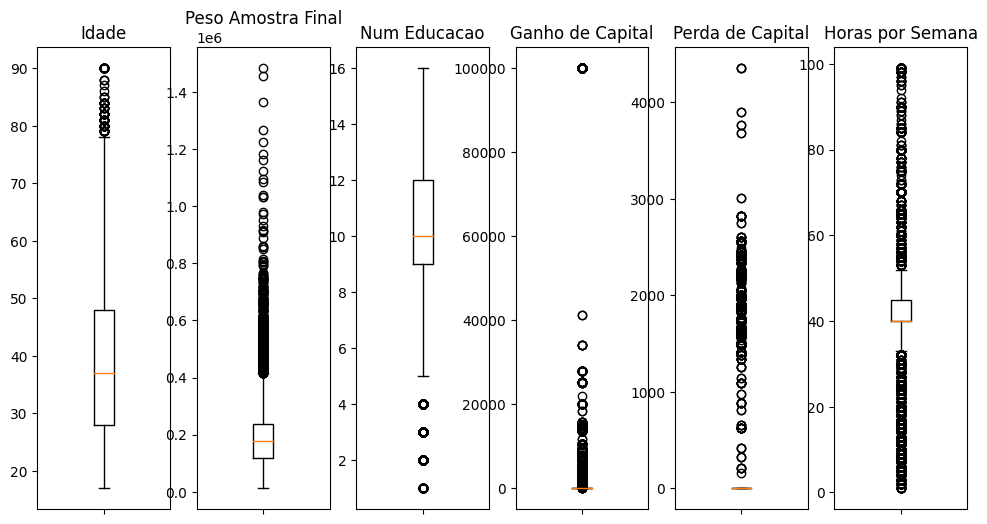

In [370]:
atributos = ['Idade', 'Peso Amostra Final', 'Num Educacao', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']

fig, axs = plt.subplots(1, len(atributos), figsize=(12, 6))
for i, atributo in enumerate(atributos):
    axs[i].boxplot(data[atributo])
    axs[i].set_title(atributo)

plt.setp(axs, xticks=[1], xticklabels=[''])
plt.show()

> A função **.describe()** que mostra informações relevantes sobre a base de dados, juntamente com os **boxsplot** na tela, ajudam a coompreender e visualizar de maneira mais fácil e eficiente os dados da base de dados.

In [378]:
data.describe()

,Idade,Peso Amostra Final,Num Educacao,Ganho de Capital,Perda de Capital,Horas por Semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Conjunto de Teste

> O que é ? para que serve?

## Análise da base de dados de teste

In [380]:
#Carregando a base de dados teste:
path = r".\databases\adult.test"
data_test = pd.read_csv(path)

In [69]:
#Printar a base de dados:
data_test.head()

,Idade,Classe Trabalhadora,Peso Amostra Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacionamento,Raca,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,Pais Nativo,Renda
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [71]:
print(f"A base de dados de teste possui {data_test.shape[0]} exemplos e {data_test.shape[1]} atributos.\nO que implica em uma base de dados com metade dos exemplos.")

A base de dados de teste possui 16281 exemplos e 15 atributos.
O que implica em uma base de dados com metade dos exemplos.


Fazer medidas localidade, espalhamento e distribuição para data_test e comparar com o original

### Comparação Medidas de Localidade

### Comparação Medidas de Espalhamento

### Comparação Medidas de Distribuição

## Conclusão

# Eliminação de Atributos💣

> O que é? para que serve?

# Eliminação de Exemplos🧨

>O que é? para que serve?

# Amostragem de Dados✨

>O que é? para que serve?

# Técnicas de Balanceamento⚖️

>O que é? para que serve?

# Limpeza de Dados

>O que é? para que serve?

# Conversão de Dados

>O que é? para que serve?

# Redução de Dimensionalidade

>O que é? para que serve?